# <center>Birth Weight Predictor</center> <h4 align="left">Authors: Rakesh Chada, Ajay Lakshminarayanarao, Nargis Nigar and Nupur Dichwalkar</h4>
<h4 align="left"> Modified By: Ashish Kulkarni</h4>
<h4 align="left"> Guided by: Professor Steven Skiena</h4>

**[Introduction](#intro)**

**[Data Cleaning & Extraction](#clean)**

**[Observations](#observations)**

**[Baseline Model](#baseline)**

**[Advanced Models](#advanced)**

**[Evaluation, Results & Comparison](#evaluation)**

**[Final Model & Prediction](#prediction)**

<a id="intro"/>
# Introduction

### Import relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
#import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from math import sqrt
import os
import sys
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading CSV and extracting only relevant columns

In [2]:
'''
Data Citation: State Center for Health Statistics, 2009, "North Carolina Vital Statistics -- Births 2008", 
http://hdl.handle.net/1902.29/10446 UNF:5:aTuN+uNcon8IvlxC8H84YQ== 
Odum Institute for Research in Social Science [Distributor] V1 [Version]
'''
babiesDF = pd.read_csv('./2008_births.csv')
slicedDF = pd.DataFrame
trainDF = pd.DataFrame
testDF = pd.DataFrame
evalDF = pd.DataFrame

In [3]:
babiesDF.columns

Index([u'INST', u'RPLACE', u'RCOUNTY', u'PLURAL', u'BDATE', u'BMONTH', u'BDAY', u'BYEAR', u'SEX', u'RACE', u'FAGE', u'MAGE', u'FEDUC', u'MEDUC', u'TOTALP', u'BDEAD', u'TERMS', u'LBDATE', u'LBMONTH', u'LBYEAR', u'LOUTCOME', u'WEEKS', u'PRENATAL', u'VISITS', u'WEIGHT', u'MARITAL', u'ATTEND', u'RECORD', u'CHILDREN', u'FDATE', u'FMONTH', u'FYEAR', u'BPOUND', u'BOUNCE', u'RACEMOM', u'RACEDAD', u'HISPMOM', u'HISPDAD', u'CIGNUM', u'DRINKNUM', u'GAINED', u'ANEMIA', u'CARDIAC', u'ACLUNG', u'DIABETES', u'HERPES', u'HYDRAM', u'HEMOGLOB', u'HYPERCH', u'HYPERPR', u'ECLAMP', u'CERVIX', u'PINFANT', u'PRETERM', u'RENAL', u'RHSEN', u'UTERINE', u'OTHMED', u'AMNIO', u'MONITOR', u'INDUCT', u'STIMULA', u'TOCOLY', u'ULTRA', u'OTHPROC', u'FEBRILE', u'MECONIUM', u'RUPTURE', u'ABRUPTIO', u'PREVIA', u'BLEEDING', u'SEIZURES', u'PRECLAB', u'PROLAB', u'DYSLAB', u'BREECH', u'CEPHALO', u'PROLAPSE', u'ANESTH', u'DISTRESS', u'OTHLABOR', u'VAGINAL', u'VAGCSECT', u'PRCSECT', u'RECSECT', u'FORCEPS', u'VACUUM', u'KOTEL', 

### Obtain Filtered Dataset of Relevant Columns

In [4]:
colIndex = 0
def binarizeColumn(x):
    global colIndex
    if x == colIndex:
        return 1
    else:
        return 0

def binarizeHisp(x):
    if x == 'N':
        return 0
    else:

        return 1

<a id='clean'/>
# Data Cleaning & Extraction

### The following steps are executed as part of the below cell:
- All post-birth features are eliminated.
- Two columns - Weight (in pounds) and Weight (in ounces) are combined into a single column (WEIGHTLB) that represents the weight of the baby. This column is not considered while training the dataset.
- Columns related to Race have values in the range of 0-9. These columns are split into several columns for each particular race and it would contain binary values (0 and 1) indicating if that person belongs to that race.


In [5]:
global colIndex
global slicedDF
requiredColumns = ['SEX', 'MARITAL','FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'BPOUND', 'BOUNCE', 'RACEMOM', 'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP',
                             'CERVIX','PINFANT','PRETERM','RENAL','RHSEN','UTERINE']
#requiredColumns = ['SEX', 'MARITAL','FAGE', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'BPOUND', 'BOUNCE', 'WEIGHT', 'RACEMOM', 'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'GAINED', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP',
                             #'CERVIX','PINFANT','PRETERM','RENAL','RHSEN','UTERINE']
#requiredColumns = ['SEX', 'MARITAL','FAGE', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'BPOUND', 'BOUNCE', 'WEIGHT', 'RACEMOM', 'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'GAINED', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HEMOGLOB', 'HYPERCH', 'HYPERPR',
                             #'PINFANT','PRETERM']
slicedDF = babiesDF.ix[:,requiredColumns]

print "Initial number of rows present are:", len(slicedDF)

#Removing rows with missing weight details
slicedDF = slicedDF[slicedDF['BPOUND']!=99]
slicedDF = slicedDF[slicedDF['BOUNCE']!=99]
len(slicedDF)

#adding a new column for weight in pounds
weightPound = slicedDF['BPOUND']
weightOunces = slicedDF['BOUNCE']
weight = weightPound.astype(np.float) + (0.0625 * weightOunces.astype(np.float))
slicedDF['WEIGHTLB'] = weight
raceColumns = ['OTHER_NON_WHITE', 'WHITE', 'BLACK', 'AMERICAN_INDIAN', 'CHINESE', 'JAPANESE', 'HAWAIIAN', 'FILIPINO', 'OTHER_ASIAN']
for race in raceColumns:
    slicedDF[race + '_MOM'] = slicedDF['RACEMOM'].map(binarizeColumn)
    colIndex = colIndex + 1
colIndex = 0
for race in raceColumns:
    slicedDF[race + '_DAD'] = slicedDF['RACEDAD'].map(binarizeColumn)
    colIndex = colIndex + 1
slicedDF['HISPMOM_BINARY'] = slicedDF['HISPMOM'].map(binarizeHisp)
slicedDF['HISPDAD_BINARY'] = slicedDF['HISPDAD'].map(binarizeHisp)
columnsToDrop = ['BPOUND','BOUNCE','RACEMOM','RACEDAD','HISPMOM','HISPDAD']
for column in columnsToDrop:
    slicedDF = slicedDF.drop(column, 1)
    
missing99Columns = ['MAGE','FEDUC','MEDUC','TOTALP','BDEAD','TERMS','WEEKS','CIGNUM','DRINKNUM','GAINED', 'VISITS']
#missing99Columns = ['MAGE','FEDUC','MEDUC','TOTALP','BDEAD','TERMS','WEEKS','WEIGHT','CIGNUM','DRINKNUM']
missing9Columns = ['ANEMIA','CARDIAC','ACLUNG','DIABETES','HERPES','HYDRAM','HEMOGLOB','HYPERCH','HYPERPR','ECLAMP'
                   ,'CERVIX','PINFANT','PRETERM','RENAL','RHSEN','UTERINE','MARITAL']
#missing9Columns = ['LOUTCOME','ANEMIA','CARDIAC','ACLUNG','DIABETES','HERPES','HEMOGLOB','HYPERCH','HYPERPR',
                   #'PINFANT','PRETERM']
missingValDF = slicedDF[slicedDF['FAGE']!=99]

for col in missing99Columns:
    missingValDF = missingValDF[missingValDF[col]!=99]
    
for col in missing9Columns:
    missingValDF = missingValDF[missingValDF[col]!=9]
    
missing98Columns = ['CIGNUM','DRINKNUM']
for col in missing98Columns:
    missingValDF = missingValDF[missingValDF[col]!=98]
    
loutcome = missingValDF['LOUTCOME'][missingValDF['LOUTCOME'] == 9.0]
loutcome[missingValDF['TOTALP'] == 1.0] = 1.0
    
print "Number of rows after all the filtering are:",len(missingValDF)
print "Number of features present are:", len(missingValDF.columns)

Initial number of rows present are: 133422
Number of rows after all the filtering are: 103401
Number of features present are: 52


In [6]:
slicedDF.columns

Index([u'SEX', u'MARITAL', u'FAGE', u'GAINED', u'VISITS', u'MAGE', u'FEDUC', u'MEDUC', u'TOTALP', u'BDEAD', u'TERMS', u'LOUTCOME', u'WEEKS', u'CIGNUM', u'DRINKNUM', u'ANEMIA', u'CARDIAC', u'ACLUNG', u'DIABETES', u'HERPES', u'HYDRAM', u'HEMOGLOB', u'HYPERCH', u'HYPERPR', u'ECLAMP', u'CERVIX', u'PINFANT', u'PRETERM', u'RENAL', u'RHSEN', u'UTERINE', u'WEIGHTLB', u'OTHER_NON_WHITE_MOM', u'WHITE_MOM', u'BLACK_MOM', u'AMERICAN_INDIAN_MOM', u'CHINESE_MOM', u'JAPANESE_MOM', u'HAWAIIAN_MOM', u'FILIPINO_MOM', u'OTHER_ASIAN_MOM', u'OTHER_NON_WHITE_DAD', u'WHITE_DAD', u'BLACK_DAD', u'AMERICAN_INDIAN_DAD', u'CHINESE_DAD', u'JAPANESE_DAD', u'HAWAIIAN_DAD', u'FILIPINO_DAD', u'OTHER_ASIAN_DAD', u'HISPMOM_BINARY', u'HISPDAD_BINARY'], dtype='object')

### Split Relevant Dataset to Training Data and Test Data

Randomly data is split into 85% training data and 15% test data.

In [7]:
def get_splitDF():
        global missingValDF
        global trainDF
        global testDF
        global evalDF
        DF_temp = pd.DataFrame
        rand_nos = np.random.rand(len(missingValDF)) < 0.85
        trainDF = missingValDF[rand_nos]
        testDF = missingValDF[~rand_nos]

#         rand_nos = np.random.rand(len(DF_temp)) < 0.6
#         testDF = DF_temp[rand_nos]
#         evalDF = DF_temp[~rand_nos]

        print 'Train(len) : {0} rows'.format(str(len(trainDF)))
        print 'Test(len) : {0} rows'.format(str(len(testDF)))
        #print 'Eval(len) : {0} rows'.format(str(len(evalDF)))

get_splitDF()

Train(len) : 87990 rows
Test(len) : 15411 rows


In [8]:
trainWeights = trainDF['WEIGHTLB']
testWeights = testDF['WEIGHTLB']
#evalWeights = evalDF['WEIGHTLB']
trainDF = trainDF.drop(['WEIGHTLB'], 1)
testDF = testDF.drop(['WEIGHTLB'], 1)
#evalDF = evalDF.drop(['WEIGHTLB','WEIGHT'], 1)

Input below Details of Sammi into the model. 
- Gender of Baby: Female
- Father’s Age: 27
- Mother’s Age: 27
- Parity of Mother: 1
- Gestation period: 41 Weeks
- Weight Gained: 20 lbs.
- Drinks per week: 0.25
- Anaemic: True
- Ethnicity of Father: WHITE
- Ethnicity of Mother: WHITE
- Marital Status: True
- Education of Father: 12 years
- Education of Mother: 16 years
- Pre Natal Care: True
- Number of Prenatal Visits: 11

In [9]:
sammiRow = [2, 1, 27, 20, 11, 27, 16, 12, 1, 0, 0, 1, 40, 0, 0.25, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lastIndex = testDF.index[len(testDF.index) - 1]
testDF.loc[lastIndex + 1] = sammiRow
#print testDF.loc[lastIndex + 1]

In [10]:
testDF.columns

Index([u'SEX', u'MARITAL', u'FAGE', u'GAINED', u'VISITS', u'MAGE', u'FEDUC', u'MEDUC', u'TOTALP', u'BDEAD', u'TERMS', u'LOUTCOME', u'WEEKS', u'CIGNUM', u'DRINKNUM', u'ANEMIA', u'CARDIAC', u'ACLUNG', u'DIABETES', u'HERPES', u'HYDRAM', u'HEMOGLOB', u'HYPERCH', u'HYPERPR', u'ECLAMP', u'CERVIX', u'PINFANT', u'PRETERM', u'RENAL', u'RHSEN', u'UTERINE', u'OTHER_NON_WHITE_MOM', u'WHITE_MOM', u'BLACK_MOM', u'AMERICAN_INDIAN_MOM', u'CHINESE_MOM', u'JAPANESE_MOM', u'HAWAIIAN_MOM', u'FILIPINO_MOM', u'OTHER_ASIAN_MOM', u'OTHER_NON_WHITE_DAD', u'WHITE_DAD', u'BLACK_DAD', u'AMERICAN_INDIAN_DAD', u'CHINESE_DAD', u'JAPANESE_DAD', u'HAWAIIAN_DAD', u'FILIPINO_DAD', u'OTHER_ASIAN_DAD', u'HISPMOM_BINARY', u'HISPDAD_BINARY'], dtype='object')

In [11]:
#Verify if sammi's data got added properly
testDF.tail(5)

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,...,WHITE_DAD,BLACK_DAD,AMERICAN_INDIAN_DAD,CHINESE_DAD,JAPANESE_DAD,HAWAIIAN_DAD,FILIPINO_DAD,OTHER_ASIAN_DAD,HISPMOM_BINARY,HISPDAD_BINARY
133189,1,1,33,45,14,29,14,16,2,0,...,1,0,0,0,0,0,0,0,0,0
133193,2,1,38,19,10,31,12,15,1,0,...,1,0,0,0,0,0,0,0,0,0
133196,2,1,42,25,6,35,12,12,3,0,...,1,0,0,0,0,0,0,0,0,0
133223,1,1,38,17,12,33,16,16,3,0,...,0,0,0,0,0,0,0,1,0,0
133224,2,1,27,20,11,27,16,12,1,0,...,1,0,0,0,0,0,0,0,0,0


Normalize the required columns to bring them to same scale as others. This is required for models such as k-nearest neighbours so that all features are given equal consideration for the prediction.

The method below normalizes the columns using <b>z-scores</b>.

In [12]:
def normalizeData(df, nonStandardColumns):
   for col in nonStandardColumns:
       xx = df[col]
       mean_xx = np.mean(df[col])
       std_xx = np.std(df[col])
       df[col+'_NEW'] = (df[col]-mean_xx)/std_xx
       df.drop(axis=1,labels=[col], inplace=True)

In [13]:
columns = ['FAGE','MAGE','FEDUC','VISITS','MEDUC','TOTALP','BDEAD','TERMS','WEEKS','CIGNUM','DRINKNUM','GAINED']
normalizeData(trainDF,columns)
normalizeData(testDF,columns)

<a id="observations"/>
# Observations

# Initial data analysis 

In [14]:
trainDF.columns

Index([u'SEX', u'MARITAL', u'LOUTCOME', u'ANEMIA', u'CARDIAC', u'ACLUNG', u'DIABETES', u'HERPES', u'HYDRAM', u'HEMOGLOB', u'HYPERCH', u'HYPERPR', u'ECLAMP', u'CERVIX', u'PINFANT', u'PRETERM', u'RENAL', u'RHSEN', u'UTERINE', u'OTHER_NON_WHITE_MOM', u'WHITE_MOM', u'BLACK_MOM', u'AMERICAN_INDIAN_MOM', u'CHINESE_MOM', u'JAPANESE_MOM', u'HAWAIIAN_MOM', u'FILIPINO_MOM', u'OTHER_ASIAN_MOM', u'OTHER_NON_WHITE_DAD', u'WHITE_DAD', u'BLACK_DAD', u'AMERICAN_INDIAN_DAD', u'CHINESE_DAD', u'JAPANESE_DAD', u'HAWAIIAN_DAD', u'FILIPINO_DAD', u'OTHER_ASIAN_DAD', u'HISPMOM_BINARY', u'HISPDAD_BINARY', u'FAGE_NEW', u'MAGE_NEW', u'FEDUC_NEW', u'VISITS_NEW', u'MEDUC_NEW', u'TOTALP_NEW', u'BDEAD_NEW', u'TERMS_NEW', u'WEEKS_NEW', u'CIGNUM_NEW', u'DRINKNUM_NEW', u'GAINED_NEW'], dtype='object')

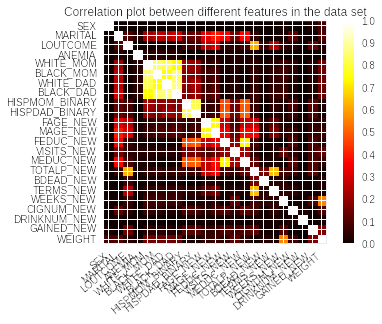

In [15]:
requiredColumns = [u'SEX', u'MARITAL', u'LOUTCOME', u'ANEMIA', u'WHITE_MOM', u'BLACK_MOM', u'WHITE_DAD', u'BLACK_DAD', u'HISPMOM_BINARY', u'HISPDAD_BINARY', u'FAGE_NEW', u'MAGE_NEW', u'FEDUC_NEW', u'VISITS_NEW', u'MEDUC_NEW', u'TOTALP_NEW', u'BDEAD_NEW', u'TERMS_NEW', u'WEEKS_NEW', u'CIGNUM_NEW', u'DRINKNUM_NEW', u'GAINED_NEW']
corrTrainDF = trainDF.ix[:,requiredColumns]
corrTrainDF['WEIGHT'] = trainWeights
corrDf = corrTrainDF.corr()
#replace all -ve values with +ve values
corrDf=corrDf.where(corrDf>0, corrDf * -1)
plt.imshow(corrDf, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrDf)),corrDf.columns)
locs, labels = plt.xticks()
plt.setp(labels, rotation=40, ha='right')
ticks = plt.yticks(range(len(corrDf)), corrDf.columns)
plt.title('Correlation plot between different features in the data set')
plt.show()

# Effect of Smoking on Birth Weight

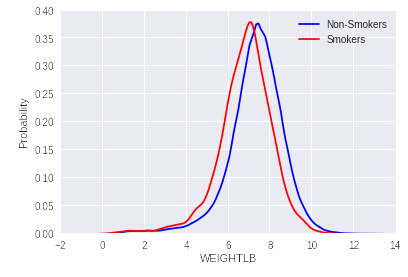

In [16]:
noCigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM']==0.0]
sns.distplot(noCigList, bins= 15, color = 'blue', hist=False, label= 'Non-Smokers')
#cigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM'].isin(frange(1.0,99.0,1.0))]
cigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM'] != 0.0]
sns.distplot(cigList, bins = 15, color = 'red', hist=False, label= 'Smokers')
plt.ylabel('Probability')
plt.show()

# Effect of Drinking on Birth Weight

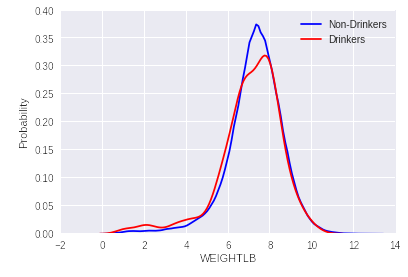

In [17]:
noDrinkList = missingValDF['WEIGHTLB'][missingValDF['DRINKNUM']==0.0]
sns.distplot(noDrinkList, bins= 15, color = 'blue', hist=False, label= 'Non-Drinkers')
#cigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM'].isin(frange(1.0,99.0,1.0))]
drinkList = missingValDF['WEIGHTLB'][missingValDF['DRINKNUM'] != 0.0]
sns.distplot(drinkList, bins = 15, color = 'red', hist=False, label= 'Drinkers')
plt.ylabel('Probability')
plt.show()

# Birth Weight Distribution according to Gender

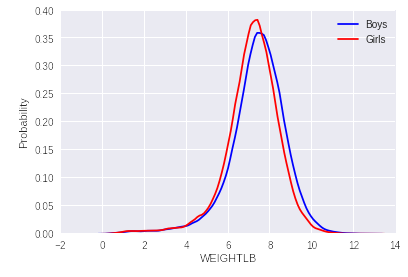

In [18]:
boyList = missingValDF['WEIGHTLB'][missingValDF['SEX']== 1.0]
sns.distplot(boyList, bins= 15, color = 'blue', hist=False, label= 'Boys')
#cigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM'].isin(frange(1.0,99.0,1.0))]
girlList = missingValDF['WEIGHTLB'][missingValDF['SEX'] == 2.0]
sns.distplot(girlList, bins = 15, color = 'red', hist=False, label= 'Girls')
plt.ylabel('Probability')
plt.show()

# Birth Weight Distribution according to APGAR Score

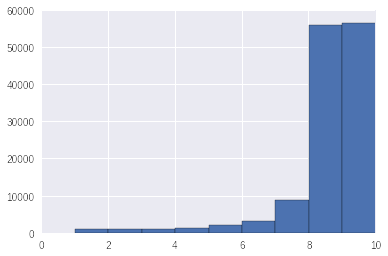

In [19]:
babiesDF = babiesDF[babiesDF['APGAR1']!=99]
ap = babiesDF['APGAR1']
ap.hist()

Based on the the histogram plotted above, we observed that the most dominant APGAR scores are 8 and 9.

### Probablity Distribution of APGAR Scores 8 and 9

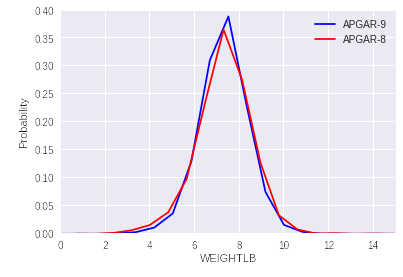

In [20]:
babiesDF = babiesDF[babiesDF['APGAR1']!=99]
weightPound_x = babiesDF['BPOUND']
weightOunces_x = babiesDF['BOUNCE']
weight_x= weightPound_x.astype(np.float) + (0.0625 * weightOunces_x.astype(np.float))
babiesDF['WEIGHTLB'] = weight_x


apList1 = babiesDF['WEIGHTLB'][babiesDF['APGAR1']== 9.0]
sns.distplot(apList1, bins= 15, color = 'blue', hist=False, label= 'APGAR-9')
#cigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM'].isin(frange(1.0,99.0,1.0))]
apList2 = babiesDF['WEIGHTLB'][babiesDF['APGAR1']== 8.0]
sns.distplot(apList2, bins = 15, color = 'red', hist=False, label= 'APGAR-8')
plt.ylabel('Probability')
plt.xlim((0,15))
plt.show()

In [21]:
apList = babiesDF['WEIGHTLB'][babiesDF['APGAR1']== 1]
len(babiesDF)

132409

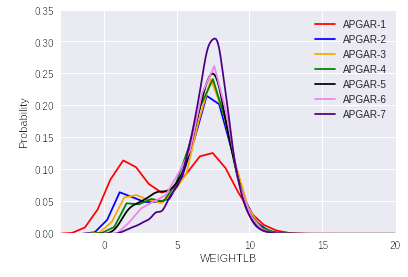

In [22]:
colors = ['red', 'blue', 'orange', 'green', 'black', 'violet', 'indigo', 'brown']
for i in range(1,8):
    apList = babiesDF['WEIGHTLB'][babiesDF['APGAR1']== i]
    sns.distplot(apList, bins = 15, color = colors[i-1], hist=False, label= 'APGAR-'+str(i))
plt.xlim((-3,20))
plt.ylabel('Probability')

In [23]:
missingValDF.columns

Index([u'SEX', u'MARITAL', u'FAGE', u'GAINED', u'VISITS', u'MAGE', u'FEDUC', u'MEDUC', u'TOTALP', u'BDEAD', u'TERMS', u'LOUTCOME', u'WEEKS', u'CIGNUM', u'DRINKNUM', u'ANEMIA', u'CARDIAC', u'ACLUNG', u'DIABETES', u'HERPES', u'HYDRAM', u'HEMOGLOB', u'HYPERCH', u'HYPERPR', u'ECLAMP', u'CERVIX', u'PINFANT', u'PRETERM', u'RENAL', u'RHSEN', u'UTERINE', u'WEIGHTLB', u'OTHER_NON_WHITE_MOM', u'WHITE_MOM', u'BLACK_MOM', u'AMERICAN_INDIAN_MOM', u'CHINESE_MOM', u'JAPANESE_MOM', u'HAWAIIAN_MOM', u'FILIPINO_MOM', u'OTHER_ASIAN_MOM', u'OTHER_NON_WHITE_DAD', u'WHITE_DAD', u'BLACK_DAD', u'AMERICAN_INDIAN_DAD', u'CHINESE_DAD', u'JAPANESE_DAD', u'HAWAIIAN_DAD', u'FILIPINO_DAD', u'OTHER_ASIAN_DAD', u'HISPMOM_BINARY', u'HISPDAD_BINARY'], dtype='object')

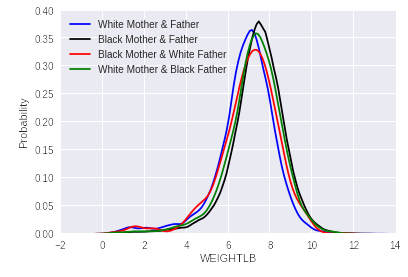

In [24]:
blackMomList = missingValDF['WEIGHTLB'][missingValDF['BLACK_MOM']==1.0]
blackList = blackMomList[missingValDF['BLACK_DAD']==1.0]
blackWhiteList = blackMomList[missingValDF['WHITE_DAD']==1.0]

whiteMomList = missingValDF['WEIGHTLB'][missingValDF['WHITE_MOM']==1.0]
whiteList = whiteMomList[missingValDF['WHITE_DAD']==1.0]
whiteBlackList = whiteMomList[missingValDF['BLACK_DAD']==1.0]


sns.distplot(blackList, bins= 15, color = 'blue', hist=False, label= 'White Mother & Father')
sns.distplot(whiteList, bins = 15, color = 'black', hist=False, label= 'Black Mother & Father')
sns.distplot(blackWhiteList, bins = 15, color = 'red', hist=False, label= 'Black Mother & White Father')
sns.distplot(whiteBlackList, bins = 15, color = 'green', hist=False, label= 'White Mother & Black Father')
#sns.distplot(blackDadList, bins= 15, color = 'green', hist=False, label= 'White Fathers')
#sns.distplot(whiteDadList, bins = 15, color = 'black', hist=False, label= 'Black Fathers')
plt.ylabel('Probability')
plt.show()

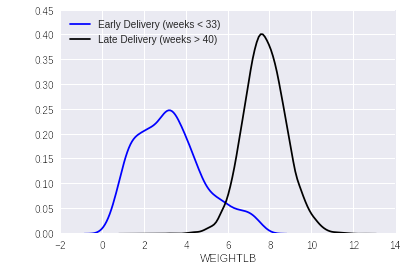

In [25]:
early = missingValDF['WEIGHTLB'][missingValDF['WEEKS']<33.0]
late = missingValDF['WEIGHTLB'][missingValDF['WEEKS']>40.0]
sns.distplot(early, bins= 15, color = 'blue', hist=False, label= 'Early Delivery (weeks < 33)')
sns.distplot(late, bins = 15, color = 'black', hist=False, label= 'Late Delivery (weeks > 40)')

In [26]:
len(missingValDF[missingValDF['TOTALP'] == 1])

34153

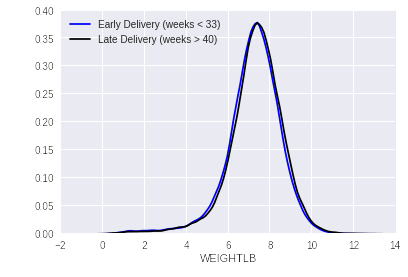

In [27]:
early = missingValDF['WEIGHTLB'][missingValDF['TOTALP']==1.0]
late = missingValDF['WEIGHTLB'][missingValDF['TOTALP']==2.0]
sns.distplot(early, bins= 15, color = 'blue', hist=False, label= 'Early Delivery (weeks < 33)')
sns.distplot(late, bins = 15, color = 'black', hist=False, label= 'Late Delivery (weeks > 40)')

<center><h2> A brief overview of models and evaluation framework</h2></center>

We have used the following machine learning models on our dataset.
- Ordinary Least Squares Regression
- Ridge Regression
- K Nearest Neighbors
- Decision Trees
- Adaboost (with decision trees)
- Random Forest Regression

For the evaluation, we show the plots of error distribution and values for the following error metrics:
- Root Mean Square Error
- R2 score
- Mean Absolute Error
- Explained Variance Score

In [28]:
def frange(start, end=None, inc=None):
    "A range function, that does accept float increments..."

    if end == None:
        end = start + 0.0
        start = 0.0

    if inc == None:
        inc = 1.0

    L = []
    while 1:
        next = start + len(L) * inc
        if inc > 0 and next >= end:
            break
        elif inc < 0 and next <= end:
            break
        L.append(next)
        
    return L

In [29]:
dictny = {}

The following is our common evaluation function which is called for each machine learning model we built. It produces an error distribution plot with lines indicating mean and standard deviation. It also outputs the error metrics for Root Mean Square Error, Mean absolute error, r2 score and explained variance score.

In [30]:
def error_distribution(testDF, actualWeight, predictedweight, modelName, plotIndex):
   #diff = 'WT_DIFF'
   #plt.subplot(3, 1, plotIndex)
   plt.xticks(frange(-7,7,0.5))
   testDF['WT_DIFF'] = (actualWeight - predictedweight)
   ax = sns.distplot(testDF['WT_DIFF'], bins=50, label='Error in Weight')
   meanError = np.mean(testDF['WT_DIFF'])
   #print "Mean Error is", meanError
   stdError = np.std(testDF['WT_DIFF'])
   line1_string = 'Mean'
   line2_string = 'Std Dev'
   #ax.set_ylim((0,1))
   ax.set_xlim((-7,7))   
   ax.set_title('Probablity Distribution of Error -' + modelName)
   ax1 = ax.plot([meanError,meanError],[0,0.5])
   pos1 = [0,0.45]
   pos2 = [1,0.4]
   pos3 = [-1,0.4]
   ax.text(pos1[0], pos1[1], line1_string, size=9, color = 'b', ha="center", va="center")
   ax2 = ax.plot([stdError,stdError],[0,0.5], color='r')
   ax.text(pos2[0], pos2[1], line2_string, size=9, color = 'b', ha="center", va="center")
   ax3 = ax.plot([-stdError,-stdError],[0,0.5], color='r')
   ax.text(pos3[0], pos3[1], line2_string, size=9, color = 'b', ha="center", va="center")
   ax.set_xlabel('Error in Weight')
   ax.set_ylabel('Probability')
   rms = sqrt(mean_squared_error(actualWeight, predictedweight))
   print 'The root mean square error for', modelName, 'is', rms
   r2score = r2_score(actualWeight, predictedweight)
   print 'The r2 score for', modelName, 'is', r2score
   evs = explained_variance_score(actualWeight, predictedweight)
   mae = mean_absolute_error(actualWeight,predictedweight)
   print 'The mean absolute error for', modelName, 'is', mae
   print 'The explained variance score for', modelName, 'is', evs
   print '\n'
   values = {}
   values['RMS'] = rms
   values['R2 Score'] = r2score
   values['Explained Variance Score'] = evs
   values['Mean Absolute Error'] = mae
   dictny[modelName] = values

<a id="baseline"/>
# Baseline Model

Our baseline model just considers the average of all the birth weights in the data set. 

### Evaluation

The root mean square error for Baseline Model is 1.32433693804
The r2 score for Baseline Model is 0.0
The mean absolute error for Baseline Model is 0.969819365516
The explained variance score for Baseline Model is 0.0




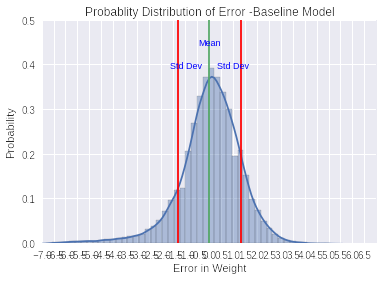

In [31]:
testDFCopy = testDF.iloc[:-1]
testDFCopy['BASELINE_WEIGHT'] = np.mean(testWeights)
testDFCopy['ACTUAL_WEIGHT'] = testWeights
error_distribution(testDFCopy, testDFCopy['ACTUAL_WEIGHT'], testDFCopy['BASELINE_WEIGHT'], 'Baseline Model', 1)
#plt.show()

### Prediction on Sammi

The prediction of baseline model on sammi is just the average of all weights in the dataset.

In [32]:
print "Prediction for Sammi's child according to Baseline Model is", np.mean(testWeights)

Prediction for Sammi's child according to Baseline Model is 7.2558197067


<a id="advanced"/>
# Advanced Models

# Ordinary Least Squares Regression Model

Converting our final dataframe into a n-dimensional list. This is required for passing our data to the interpolation model.

In [33]:
allRowsList = []
for idx,row in trainDF.iterrows():
    currentRowList = row.values.tolist()
    allRowsList.append(currentRowList)

Training the data using the OLS model.

In [34]:
clf = linear_model.LinearRegression()
clf.fit(allRowsList, trainWeights)
coeffArray = clf.coef_
intercept = clf.intercept_ 

In [35]:
print "The co-efficients and the intercept determined by the OLS Regression are:"
print "-----------------Co-efficients----------------------"
print coeffArray
print "-----------------Intercept--------------------------"
print intercept

The co-efficients and the intercept determined by the OLS Regression are:
-----------------Co-efficients----------------------
[ -2.60945370e-01  -8.84588567e-02  -1.92678390e-02  -1.43846572e-02
   5.00456911e-02  -4.07934500e-02   2.94285477e-01   1.30361655e-03
  -3.41601484e-01   6.22294939e-03  -1.69122350e-01  -3.32460269e-01
  -6.90499778e-01  -3.81770388e-01   9.04995222e-01  -4.99900696e-01
  -1.80144614e-01   4.93519752e-02  -3.32016330e-01  -1.50217675e-02
   8.36359336e-02  -1.83905530e-01  -2.42497336e-02   1.75311022e-01
  -1.99105567e-01   2.75163490e-01  -5.89279794e-02  -5.28998673e-02
  -1.49708439e-01  -1.71664201e-02  -8.52929798e-02  -5.49364281e-02
  -4.22442349e-01  -2.03714805e-01  -1.76491799e-02  -4.35932539e-01
  -3.39274011e-01   2.68378367e-02  -4.61945325e-02  -1.85997783e-04
   5.22146848e-02  -7.85288068e-03   3.89814385e-02   2.14969295e-02
   8.17097099e-02  -1.90396272e-02  -6.50372115e-02   7.11223986e-01
  -1.10529236e-01  -1.35155898e-03   1.711462

### Testing the OLS Model on our test data set

In [36]:
olsPrediction = clf.predict(testDF)

In [37]:
#Don't consider sammi's row for evaluation
testDFCopy = testDF.iloc[:-1]
testDFCopy['ACTUAL_WEIGHT'] = testWeights

### Evaluation

The root mean square error for OLS Regression is 1.03062967376
The r2 score for OLS Regression is 0.394368716849
The mean absolute error for OLS Regression is 0.802727889443
The explained variance score for OLS Regression is 0.394377761518




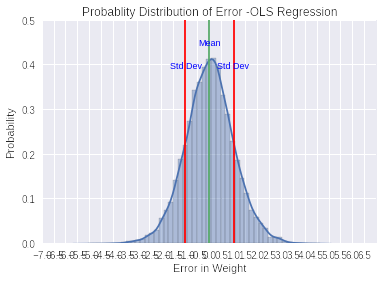

In [38]:
testDFCopy['PREDICTED_WEIGHT_OLS'] = olsPrediction[:-1]
error_distribution(testDFCopy, testDFCopy['ACTUAL_WEIGHT'], testDFCopy['PREDICTED_WEIGHT_OLS'], 'OLS Regression', 2)
#plt.show()

### Prediction on Sammi's child

The prediction of OLS Regression Model on Sammi is obtained by taking dot-product of the co-efficients obtained from the model with corresponding sammy's data.

In [38]:
print "Prediction for Sammi's child according to OLS Regression is", olsPrediction[-1]

Prediction for Sammi's child according to OLS Regression is 7.48750219811


#Ridge Regression Model

It can be observed above that the co-efficients and intercept determined by the OLS model have insanely high/low values. Ridge regression penalizes such co-efficients.

In [39]:
clf = linear_model.Ridge(alpha = 0.5)
clf.fit(allRowsList, trainWeights)
coeffArray = clf.coef_
intercept = clf.intercept_

In [40]:
print "The co-efficients and the intercept determined by the Ridge Regression are:"
print "-----------------Co-efficients----------------------"
print coeffArray
print "-----------------Intercept--------------------------"
print intercept

The co-efficients and the intercept determined by the Ridge Regression are:
-----------------Co-efficients----------------------
[ -2.61118901e-01  -9.28544548e-02  -1.93002887e-02   6.86945658e-03
   2.07837627e-02  -1.14313028e-02   2.89682253e-01   2.73459717e-02
  -3.36946153e-01  -3.79690667e-02  -1.76634854e-01  -3.46151367e-01
  -6.94728906e-01  -4.13282711e-01   9.27404484e-01  -4.74393996e-01
  -1.29748689e-01   5.43901711e-02  -3.36269429e-01  -2.70300972e-02
   6.41756987e-02  -1.94846994e-01  -5.10950204e-02   1.12296451e-01
   1.35687841e-03   3.29671725e-01  -1.27149913e-01  -1.07378728e-01
  -1.22865167e-01  -5.37638804e-02  -1.25739331e-01  -7.48048734e-02
  -4.63949934e-01  -3.79921599e-01  -2.25687107e-01  -4.17168031e-01
  -3.43517127e-01   2.22157394e-02  -3.41718498e-02   2.43528544e-03
   4.90534252e-02  -7.57335712e-03   3.62167747e-02   2.33531257e-02
   7.76239587e-02  -2.03078245e-02  -6.31675814e-02   7.14302305e-01
  -1.09603377e-01   2.95944844e-04   1.6926

In [41]:
ridgePrediction = clf.predict(testDF)

### Evaluation

The root mean square error for Ridge Regression is 1.03389096479
The r2 score for Ridge Regression is 0.38724333748
The mean absolute error for Ridge Regression is 0.804803039295
The explained variance score for Ridge Regression is 0.387338090305




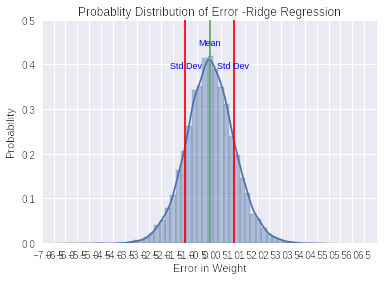

In [42]:
testDFCopy['PREDICTED_WEIGHT_RIDGE'] = ridgePrediction[:-1]
error_distribution(testDFCopy, testDFCopy['ACTUAL_WEIGHT'], testDFCopy['PREDICTED_WEIGHT_RIDGE'], 'Ridge Regression', 3)
#plt.show()

###Prediction on Sammi's child

As done for OLS Model, the prediction of Ridge Regression Model on Sammi is obtained by taking dot-product of the co-efficients obtained from the model with corresponding sammi's data.

In [43]:
print "Prediction for Sammi's child according to Ridge Regression is", ridgePrediction[-1]

Prediction for Sammi's child according to Ridge Regression is 7.48748467102


#K-nearest neighbors

The below code is for the K-nearest neighbor model. Different values of k have been tried and the accuracy has been measured and there's no particular trend observed. Higher values of k tend to perform better, but only upto a certain limit. For example, a value of k = 10 yielded about the same RMSE as when k = 150. (But is RMSE the only indicator of model performance? How about other measures/error distribution variance with k?)

In [44]:
X, y = trainDF, trainWeights

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=11)

# fit the model
knn.fit(X, y)

knnPrediction = knn.predict(testDF)

### Evaluation

The root mean square error for KNN Regression is 1.54212122676
The r2 score for KNN Regression is -0.363250269536
The mean absolute error for KNN Regression is 1.20672172107
The explained variance score for KNN Regression is -0.145773136841




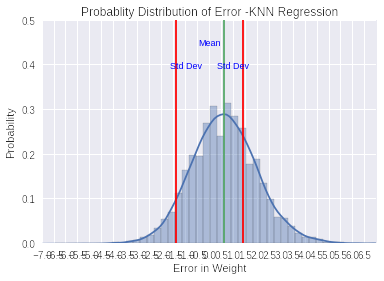

In [45]:
testDFCopy['K_NEAREST_NEIGHBOURS'] = knnPrediction[:-1]
error_distribution(testDFCopy, testDFCopy['ACTUAL_WEIGHT'], testDFCopy['K_NEAREST_NEIGHBOURS'], 'KNN Regression', 4)
plt.show()

### Prediction on Sammi's child

In [46]:
print "Prediction for Sammi's child according to k Nearest Neighbor Model is", knnPrediction[-1]

Prediction for Sammi's child according to k Nearest Neighbor Model is 4.3125


# Decision Tree Regression

The below code is for the Decision Tree model. Different values of depth limits have been tried and the accuracy has been measured at each depth. A depth limit of 7 seemed to produce the most accurate results.

In [47]:
resultsDict = {}
optimalPrediction = []
minRMS = 2.0
#testDFCopy = testDF.iloc[:-1]

for depth in range(1,15):
    
    clf_1 = DecisionTreeRegressor(max_depth=depth)
    clf_1.fit(trainDF, trainWeights)

    # Predict
    decisionTreePrediction = clf_1.predict(testDF)
    colName = str(depth) + '_DEC_TREE'

    testDFCopy[colName] = decisionTreePrediction[:-1]
    testDFCopy['ERROR_'+colName] = testDFCopy['ACTUAL_WEIGHT']  - testDFCopy[colName]   

    testDFCopy['ERROR_'+colName+'_SQUARED'] = (testDFCopy['ERROR_'+colName] * testDFCopy['ERROR_'+colName])
    rms = sqrt(np.mean(testDFCopy['ERROR_'+colName+'_SQUARED']))
    if rms < minRMS:
        minRMS = rms
        optimalPrediction = decisionTreePrediction
    print "RMS for", depth, "-d model is", rms
    resultsDict[depth] = rms

RMS for 1 -d model is 1.15583367996
RMS for 2 -d model is 1.07281065007
RMS for 3 -d model is 1.04617511652
RMS for 4 -d model is 1.03327988599
RMS for 5 -d model is 1.02402483105
RMS for 6 -d model is 1.01517217962
RMS for 7 -d model is 1.01204865891
RMS for 8 -d model is 1.00980875573
RMS for 9 -d model is 1.01117696013
RMS for 10 -d model is 1.01698251833
RMS for 11 -d model is 1.02368096672
RMS for 12 -d model is 1.03562301119
RMS for 13 -d model is 1.04310842207
RMS for 14 -d model is 1.05670522108


The following plot shows the variation of error with depth for the decision tree regression model. It can be observed that depth = 8 produces the least RMSE value.

{1: 1.155833679963234, 2: 1.0728106500700785, 3: 1.0461751165153346, 4: 1.0332798859948875, 5: 1.024024831053766, 6: 1.0151721796175117, 7: 1.0120486589072495, 8: 1.009808755727721, 9: 1.0111769601316134, 10: 1.0169825183315073, 11: 1.0236809667189162, 12: 1.0356230111898654, 13: 1.0431084220679345, 14: 1.0567052210785541}
<type 'numpy.ndarray'>


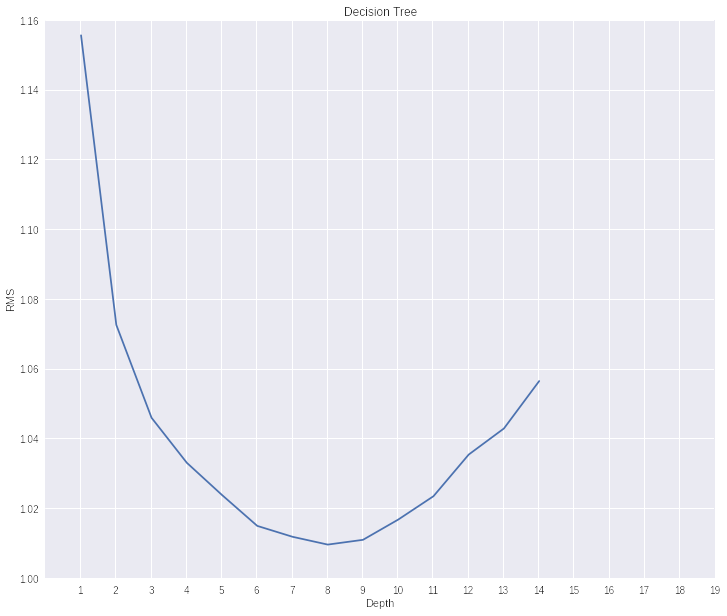

In [48]:
fig, axes = plt.subplots(figsize=(12,10))
axes.plot(resultsDict.keys(), resultsDict.values())
print resultsDict
plt.xlabel("Depth")
plt.xticks(range(1,20))
plt.ylabel("RMS")
#axes.bar(preDict.keys(), preDict.values(), align="center", width=0.5, alpha=0.5)
axes.set_title("Decision Tree")
print type(optimalPrediction)

### Evaluation

The root mean square error for Decision Tree Regression is 1.00980875573
The r2 score for Decision Tree Regression is 0.415456512942
The mean absolute error for Decision Tree Regression is 0.782917340549
The explained variance score for Decision Tree Regression is 0.415465660154




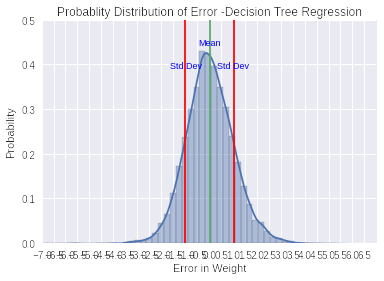

In [49]:
error_distribution(testDFCopy, testDFCopy['ACTUAL_WEIGHT'], optimalPrediction[:-1], 'Decision Tree Regression', 1)
#plt.show()

# Decision Tree with Boosting - AdaBoost Regressor

In [50]:
rng = np.random.RandomState(1)
clf_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                          n_estimators=30, random_state=rng)
clf_2.fit(trainDF, trainWeights)

# Predict
adaBoostPrediction = clf_2.predict(testDF)

### Evaluation

The root mean square error for AdaBoost Regression is 1.00401094037
The r2 score for AdaBoost Regression is 0.422149554576
The mean absolute error for AdaBoost Regression is 0.783045611839
The explained variance score for AdaBoost Regression is 0.424066599527




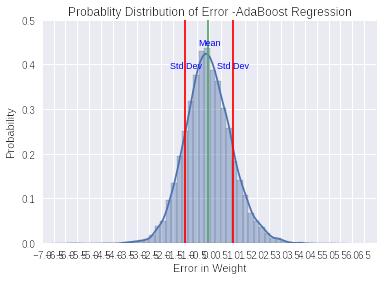

In [51]:
testDFCopy['Adaboost'] = adaBoostPrediction[:-1]
error_distribution(testDFCopy, testDFCopy['ACTUAL_WEIGHT'], testDFCopy['Adaboost'], 'AdaBoost Regression', 2)
#plt.show()

### Prediction on Sammi's child

In [52]:
print "Prediction for Sammi's child according to Ridge Regression is", adaBoostPrediction[-1]

Prediction for Sammi's child according to Ridge Regression is 7.70675381747


# Random Forest Regressor

In [51]:
clf_1 = RandomForestRegressor(max_depth=10)
clf_1.fit(trainDF, trainWeights)

# Predict
randomForestPrediction = clf_1.predict(trainDF)

In [52]:
def evaluation(modelOutput):
    modelOutput[col_error] = (modelOutput[col_predict_gross]-modelOutput[col_gross])
    modelOutput[col_rel_error] = (modelOutput[col_predict_gross]-modelOutput[col_gross])*100/modelOutput[col_gross]
    medianRelError = modelOutput[col_rel_error].median()
    minRelError = modelOutput[col_rel_error].min()
    maxRelError = modelOutput[col_rel_error].max()
    
    rmse = sqrt(mean_squared_error(modelOutput[col_gross], modelOutput[col_predict_gross]))
    r2score = r2_score(modelOutput[col_gross], modelOutput[col_predict_gross])
    
    print 'Evaluation Result'
    print '=================================================================='
    print 'Total Number of Instances:', modelOutput.shape[0]
    print 'Median Relative Absolute Error:', medianRelError, '%'
    print 'Min Relative Absolute Error:', minRelError, '%'
    print 'Max Relative Absolute Error:', maxRelError, '%'
    print 'The root mean square error:' , rmse
    print 'The r2 score:', r2score
    
    # Absoluate Error Distribution
    binNum=400
    fig1, absErrorAxe = plt.subplots(1, 1, figsize=(18,9))
    n, bins, patches = absErrorAxe.hist(modelOutput[col_error], binNum, facecolor='blue', alpha=0.75, \
                                        linewidth=0, range=(-150000000, 150000000))
    absErrorAxe.set_title("Movie Gross Relative Absolute Error Distribution", fontsize=24, fontweight='bold')
    absErrorAxe.set_xlabel('Absolute Error', fontsize=22)
    absErrorAxe.set_ylabel('Number of Movies', fontsize=22)
    plt.show()
    
    return modelOutput, medianRelError, minRelError, maxRelError
    

### Evaluation

In [48]:
#colName = 'RandomForest'
#testDFCopy[colName] = randomForestPrediction[:-1]
#dftemp = pd.DataFrame()
#error_distribution(testDFCopy, trainWeights, randomForestPrediction[:-1], 'Random Forest Regressor', 3)
#plt.show()

### Prediction on Sammi

In [55]:
print "Prediction for Sammi's child according to Random Forest Regression Model is", randomForestPrediction[-1]

Prediction for Sammi's child according to Random Forest Regression Model is 7.61111574069


<a id="evaluation"/>
# Evaluation, Results and Comparison

# Results Summary

In [56]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 2000)
newDF= pd.DataFrame(dictny)
newDF

,AdaBoost Regression,Baseline Model,Decision Tree Regression,KNN Regression,OLS Regression,Random Forest Regressor,Ridge Regression
Explained Variance Score,0.424067,0.000000,0.415466,-0.145773,0.387332,0.430088,0.387338
Mean Absolute Error,0.783046,0.968700,0.782917,1.206722,0.804808,0.773498,0.804803
R2 Score,0.422150,0.000000,0.415457,-0.363250,0.387237,0.430071,0.387243
RMS,1.004011,1.320781,1.009809,1.542121,1.033896,0.997106,1.033891


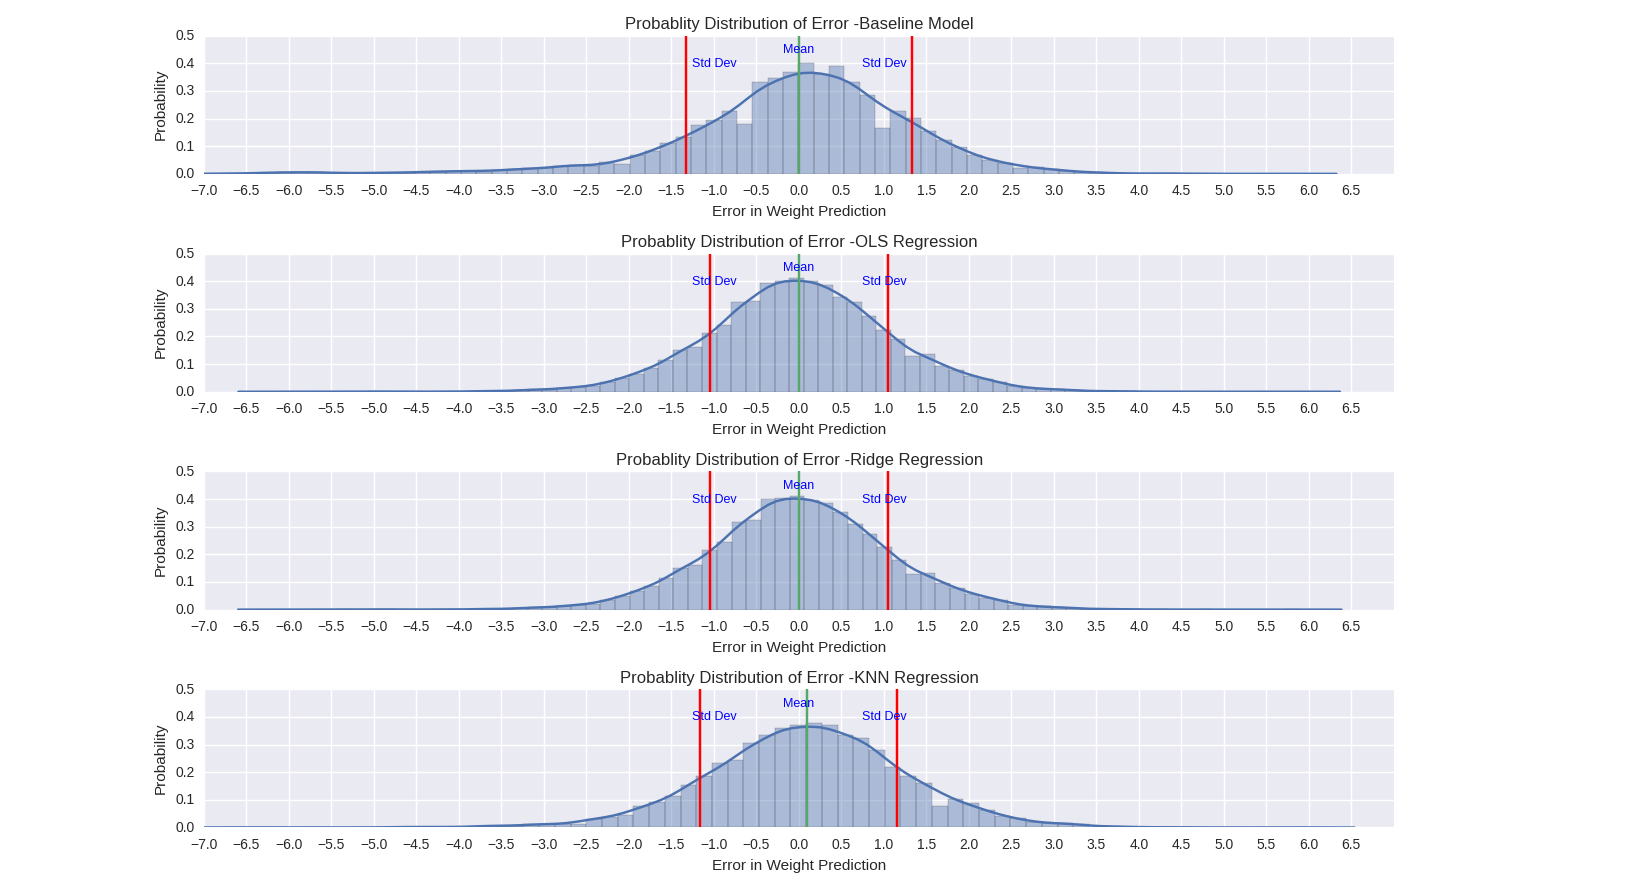

In [57]:
Image(filename='./error_part1_final.png')

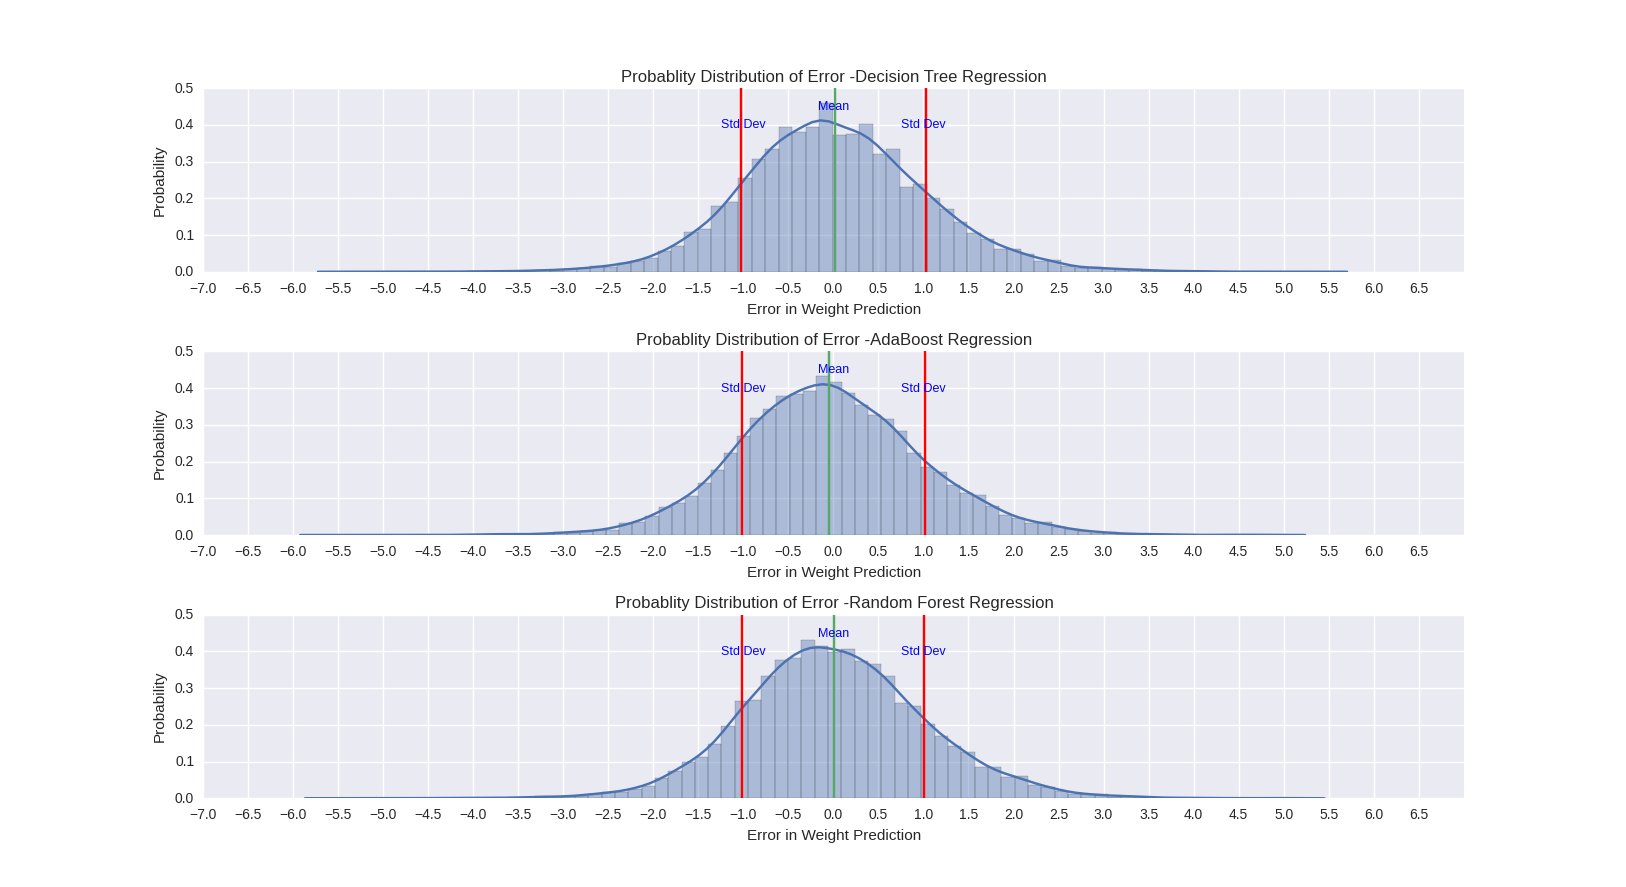

In [58]:
Image(filename='./error_part_2_final.png')

# Error Probability Distribution of all models

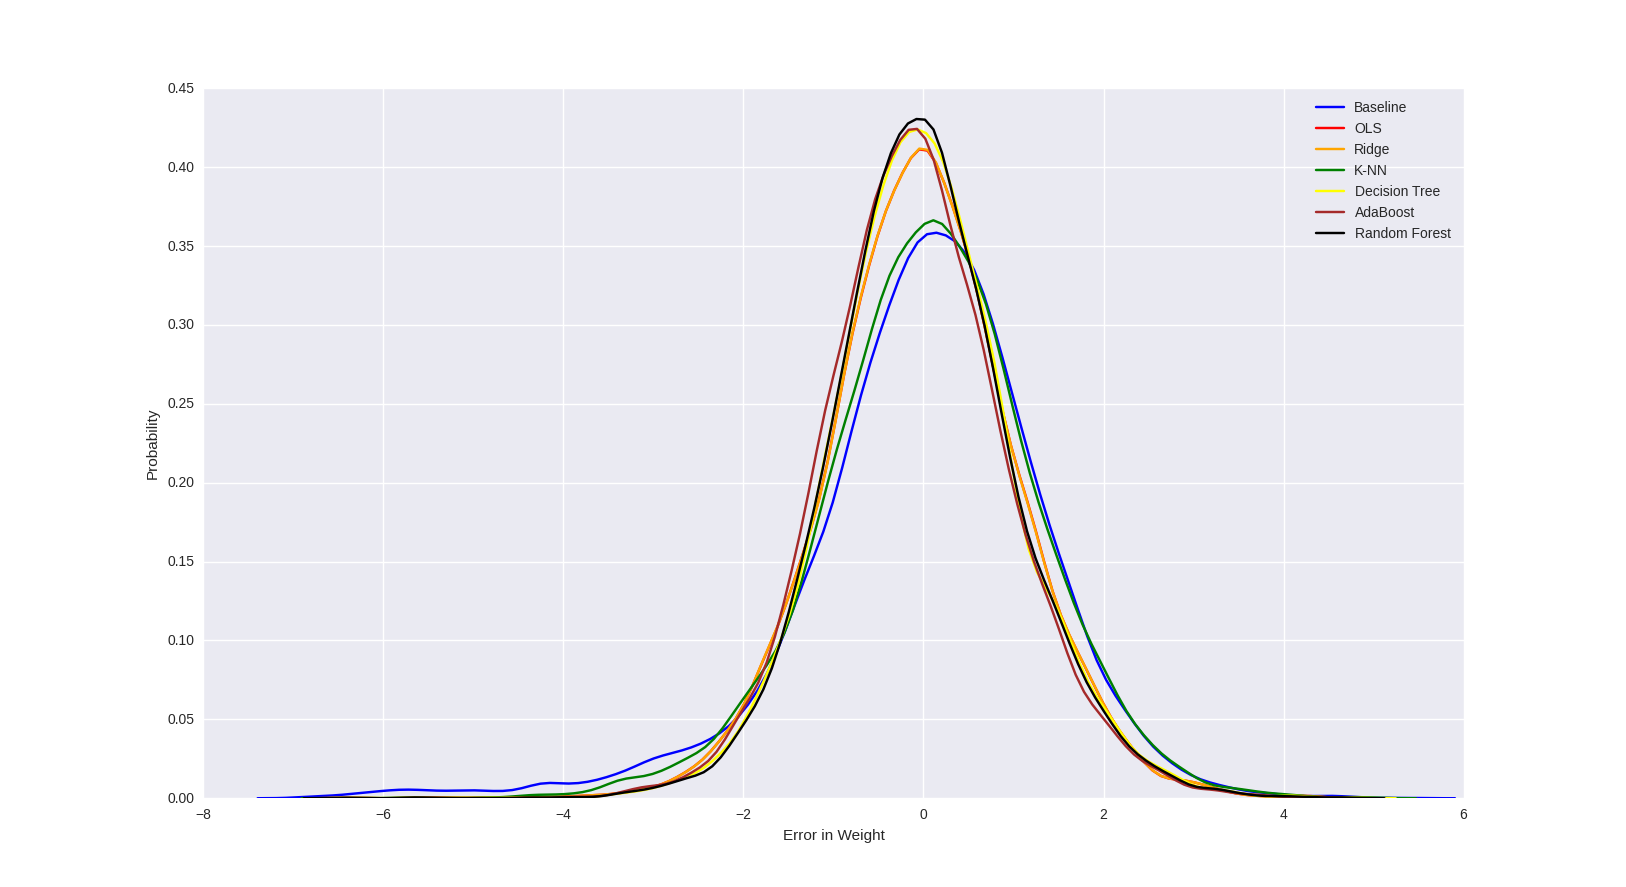

In [59]:
Image(filename='./final_error_plot.png')

<a id="prediction"/>
# Prediction

## Predicted Birth Weight of Sammi's Baby is 7lb 10oz at 41 weeks